In [14]:
import numpy as np
import pandas as pd

import os, sys
import random

try:
    os.chdir('CrowdInference')
    sys.path.append(os.getcwd())
except:
    pass

import crowd_inference.methods.dawid_skene as ds
import crowd_inference.methods.majority_vote as mv
import crowd_inference.methods.raykar as r
import crowd_inference.methods.raykar_boosting as rb
import crowd_inference.methods.raykar_plus_ds as rds
import crowd_inference.methods.classifier as cls
import benchmark as bm

from crowd_inference.truth_inference import NoFeaturesInference, TruthInference, WithFeaturesInference
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from collections import defaultdict
import tests.data_provider as data
from tqdm.auto import tqdm

import seaborn as sns
sns.set()
sns.set(font_scale=1.2)


from importlib import reload

def reload_all():
    reload(ds)
    reload(r)
    reload(rb)
    reload(rds)
    reload(cls)
    reload(bm)

reload(data)

<module 'tests.data_provider' from '/Users/andrey/Documents/5Course/CrowdInference/tests/data_provider.py'>

In [15]:
toloka_data = data.TolokaDataProvider()

Iter 00, logit: -7.475205
Iter 40, logit: -6.368210
[0.14769311 0.10560202 0.41222155 0.06779544 0.26668787]
---------------
w225 [0. 1. 0. 0. 0.]
w225 [1.86909828e-54 5.95186484e-02 9.40481352e-01 0.00000000e+00
 0.00000000e+00]
w60 [0. 1. 0. 0. 0.]
w60 [2.77428287e-51 0.00000000e+00 9.13796691e-01 5.74688727e-02
 2.87344364e-02]
w745 [0.         0.91499451 0.08500549 0.         0.        ]
w745 [0.0394251 0.0394251 0.9211498 0.        0.       ]
w690 [0.         0.66666667 0.33333333 0.         0.        ]
w690 [0.         0.05951865 0.94048135 0.         0.        ]
w670 [0. 1. 0. 0. 0.]
w670 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 9.80331293e-69]
Label accuracy is 0.7655172413793103
--------------------------------------------------
Data has 53 features
Iter 00, logit: -7.648178
Iter 40, logit: -6.176043
Iter 80, logit: -5.986880
Iter 120, logit: -5.879572
Iter 160, logit: -5.814954
(870, 53)
Classifier train accuracy is 0.6839080459770115
(121, 53)
Classifier

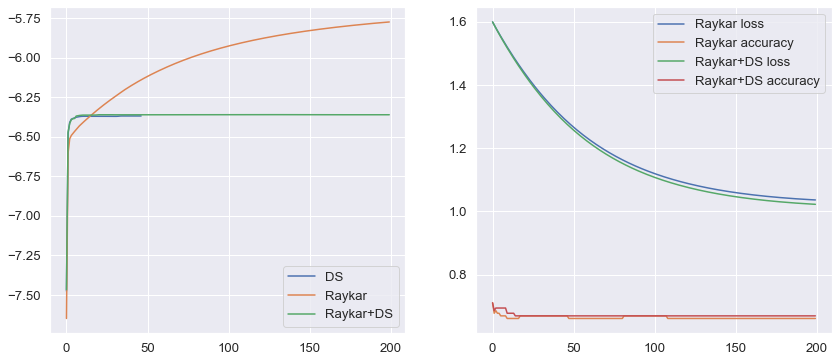

In [16]:
reload_all()
toloka_methods, toloka_points, advantages_matrix = bm.compare_methods(toloka_data, max_iter=200, lr=100)
# [('DS', 0.786074672048436), ('Raykar', 0.7790110998990918)]

Number of data points: 870


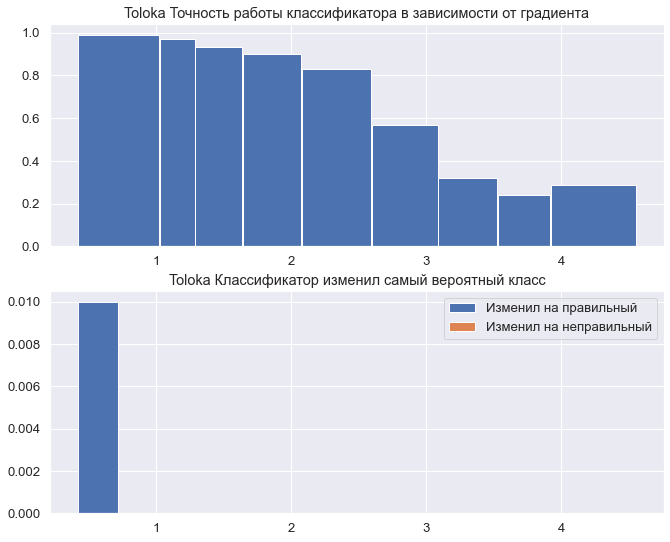

In [4]:
buckets, confidences, wrong, correct = bm.build_grad_hist(toloka_data, toloka_methods, toloka_points, 'Toloka', 100)
condidence_toloka = bm.get_confidence(buckets[0], confidences[0])

Iter 00, logit: -7.475205
Iter 20, logit: -6.370250
Iter 40, logit: -6.368210
[0.14769311 0.10560202 0.41222155 0.06779544 0.26668787]
---------------
w225 [0. 1. 0. 0. 0.]
w225 [1.86909828e-54 5.95186484e-02 9.40481352e-01 0.00000000e+00
 0.00000000e+00]
w60 [0. 1. 0. 0. 0.]
w60 [2.77428287e-51 0.00000000e+00 9.13796691e-01 5.74688727e-02
 2.87344364e-02]
w745 [0.         0.91499451 0.08500549 0.         0.        ]
w745 [0.0394251 0.0394251 0.9211498 0.        0.       ]
w690 [0.         0.66666667 0.33333333 0.         0.        ]
w690 [0.         0.05951865 0.94048135 0.         0.        ]
w670 [0. 1. 0. 0. 0.]
w670 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 9.80331293e-69]
Label accuracy is 0.7655172413793103
--------------------------------------------------
Data has 53 features
Iter 00, logit: -7.637684
Iter 20, logit: -6.170058
Iter 40, logit: -5.982609
Iter 60, logit: -5.876876
Iter 80, logit: -5.813181
(870, 53)
Classifier train accuracy is 0.6839080459770

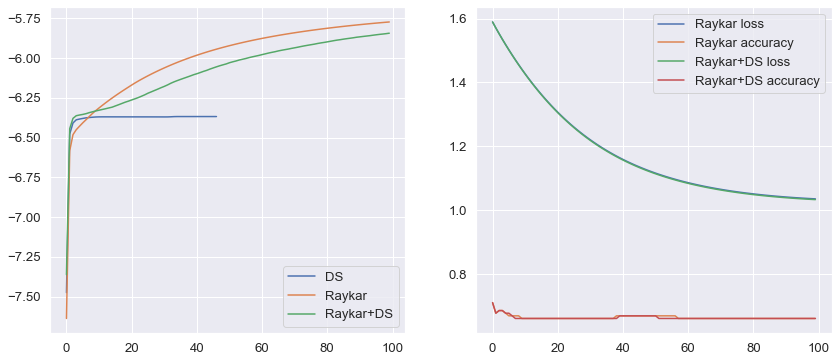

In [5]:
reload_all()
toloka_methods, toloka_points, advantages_matrix = bm.compare_methods(toloka_data, max_iter=100, lr=200, 
                                                                      confidence_estimator=condidence_toloka)

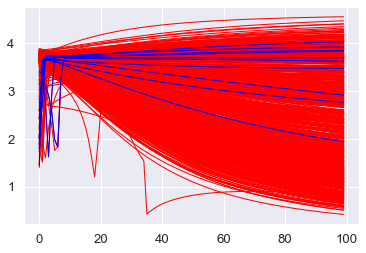

In [6]:
reload_all()
bm.plot_all_gradients(toloka_points,
                              toloka_points[toloka_points.task.isin(advantages_matrix[0][1])], 'Toloka') 

In [7]:
toloka_points[toloka_points.task.isin(advantages_matrix[1][0])]

,task,mu_ds,conf_mx_ds,mu_r,conf_mx_r,classifier_r,grad_r,mu_rds,conf_mx_rds,classifier_rds,grad_rds,likelihood_rds,index
55,t110,"[0.0, 0.0, 1.0, 0.0, 0.0]","[-inf, -inf, -14.39, -inf, -inf]","[0.0, 1.0, 0.0, 0.0, 0.0]","[-inf, -11.251, -inf, -inf, -inf]","[0.074, 0.225, 0.542, 0.084, 0.076]","[1.40095, 3.21574, 3.69413, 3.68975, 3.68507, ...","[0.0, 1.0, 0.0, 0.0, 0.0]","[-inf, -11.28, -inf, -inf, -inf]","[0.076, 0.233, 0.53, 0.085, 0.076]",3.54778,"[0.24, 0.76]",55
144,t210,"[0.0, 0.0, 0.0, 0.0, 1.0]","[-inf, -inf, -inf, -inf, -8.824]","[0.0, 0.0, 0.0, 1.0, 0.0]","[-inf, -inf, -inf, -8.539, -130.902]","[0.268, 0.104, 0.027, 0.175, 0.426]","[1.80342, 2.2981, 2.68868, 3.20463, 3.58691, 3...","[0.0, 0.0, 0.0, 0.0, 1.0]","[-inf, -inf, -inf, -inf, -9.131]","[0.261, 0.097, 0.026, 0.14, 0.476]",2.46566,"[0.83, 0.17]",144
153,t22,"[0.0, 0.0, 1.0, 0.0, 0.0]","[-613.276, -17.325, -6.292, -inf, -inf]","[0.0, 1.0, 0.0, 0.0, 0.0]","[-inf, -4.801, -245.74, -inf, -inf]","[0.337, 0.123, 0.084, 0.179, 0.278]","[2.62959, 1.54174, 3.06586, 3.61289, 3.69632, ...","[0.0, 1.0, 0.0, 0.0, 0.0]","[-inf, -4.801, -127.992, -inf, -inf]","[0.338, 0.117, 0.085, 0.163, 0.297]",4.04834,"[0.286, 0.714]",153


Annotation(annotator='w730', task='t118', value='3')
Annotation(annotator='w680', task='t118', value='3')
Annotation(annotator='w365', task='t118', value='3')
Annotation(annotator='w200', task='t118', value='3')
Annotation(annotator='w450', task='t118', value='3')
Annotation(annotator='w765', task='t118', value='3')
Annotation(annotator='w70', task='t118', value='3')
Annotation(annotator='w485', task='t118', value='3')
Annotation(annotator='w35', task='t118', value='3')
Annotation(annotator='w45', task='t118', value='3')
Annotation(annotator='w235', task='t118', value='3')
Annotation(annotator='w370', task='t118', value='3')
Annotation(annotator='w695', task='t118', value='3')


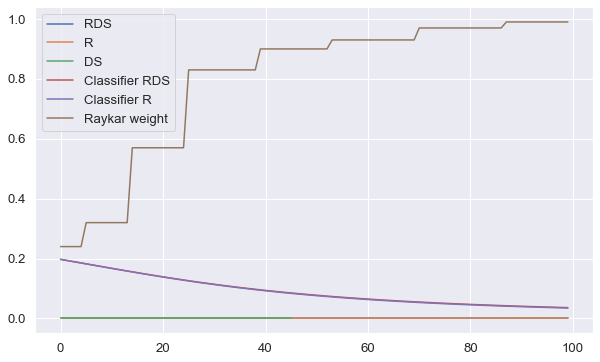

In [8]:
bm.plots_for_point(toloka_points, toloka_data, toloka_methods, 62)

0.9954022988505747
0.558


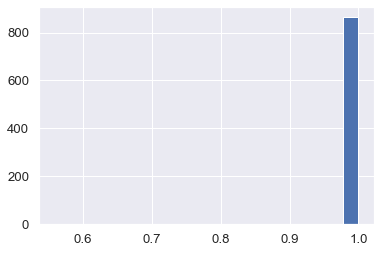

In [9]:
def build_conf_hist(points, name):
    max_confidence = np.array(list(map(lambda x: x.max(), points[name].values)))
    plt.hist(max_confidence, bins=20)
    print((max_confidence > 0.95).mean())
    print(max_confidence.min())
build_conf_hist(toloka_points, 'mu_ds')

/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


3 10


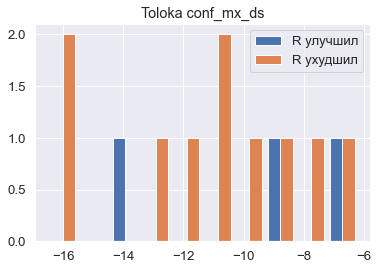

In [10]:
reload_all()
bm.plot_flips(toloka_points[toloka_points.task.isin(advantages_matrix[1][0])], 
              toloka_points[toloka_points.task.isin(advantages_matrix[0][1])], 'conf_mx_ds', 'Toloka', 'R улучшил', 'R ухудшил')

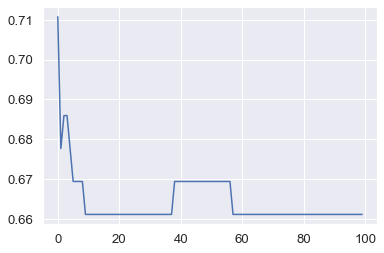

In [11]:
plt.plot(toloka_methods[1].accuracies)

[[0.         0.         1.         0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.33333333 0.16666667 0.33333333 0.         0.16666667]
 [0.         0.         1.         0.         0.        ]
 [0.         0.22222222 0.66666667 0.         0.11111111]
 [0.         0.         0.36363636 0.63636364 0.        ]
 [0.         0.         0.94117647 0.05882353 0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.03125    0.96875   ]
 [0.         0.         1.         0.         0.        ]]



[[0.         0.         1.         0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.33333333 0.16666667 0.33333333 0.         0.16666667]
 [0.         0.         1.         0.         0.        ]
 [0.         0.22222222 0.66666667 0.         0.11111111]
 [0.         0.         0.36363636 0.63636364 0.        ]
 [0.         0.         0.94117647 0.05882353 0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.03125    0.96875   ]
 [0.         0.         1.         0.         0.        ]]
[1.5939739421439467, 1.5792208525460654, 1.5649466903278495, 1.5512129150684526, 1.537969406142463, 1.5251900649966543, 1.5128558769135187, 1.5010221543360587, 1.4896255943796488, 1.4785597243075967, 1.467940462784907, 1.4577160234346003, 1.4479571415419408, 1.438501428134546, 1.4294059013936, 1.4207040150876833, 1.4122238346211504, 1.404175412926015, 1.3964365660944116, 1.3889536071255622, 1.3817598835785252, 1.37

0.47107438016528924

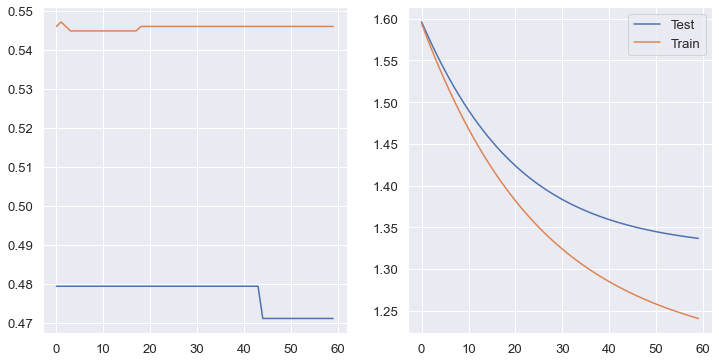

In [12]:
reload_all()
bm.run_mv_classifier(toloka_data, iters=60, n_classes=5, lr=300, hard=False)

[[0.         0.         1.         0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.33333333 0.16666667 0.33333333 0.         0.16666667]
 [0.         0.         1.         0.         0.        ]
 [0.         0.22222222 0.66666667 0.         0.11111111]
 [0.         0.         0.36363636 0.63636364 0.        ]
 [0.         0.         0.94117647 0.05882353 0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.03125    0.96875   ]
 [0.         0.         1.         0.         0.        ]]



[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[1.609424140802649, 1.6094119347515035, 1.609393710728511, 1.6093796942521197, 1.6093667392117015, 1.6093620380556732, 1.6093499323919807, 1.6093314127352358, 1.6093106801248973, 1.6092970795866253, 1.6092849837894676, 1.6092830074081763, 1.609261647709293, 1.6092506418980077, 1.6092382537087924, 1.6092245618784877, 1.6092136306916198, 1.609195126289454, 1.6091828205788288, 1.6091703109189122, 1.6091665129573995, 1.6091513088629241, 1.6091383866006077, 1.6091298442549231, 1.6091055311377345, 1.6091024681638721, 1.609090145199143, 1.6090814203633834, 1.6090737388474443, 1.6090541670319363, 1.6090416885549494, 1.6090305895472445, 1.6090201954220875, 1.6090018703811932, 1.609001407732764, 1.6089925196468022, 1.6089752421584214, 1.6089585136724713, 1.6089496367524765, 1.6089386942689914, 1.608922844777038, 1.60

0.3305785123966942

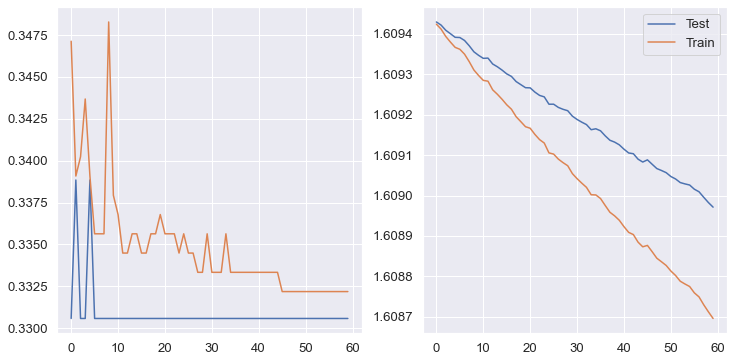

In [13]:
reload_all()
bm.run_mv_classifier(toloka_data, iters=60, n_classes=5, lr=30, hard=True)